In [155]:
%matplotlib inline
from matplotlib import style # type: ignore
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [156]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [157]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [158]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [159]:

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Windows\Temp\ipykernel_18876\892489982.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [160]:
# View all of the classes that automap found
for class_name in Base.classes.keys():
    print(class_name)

station
measurement


In [161]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [162]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [163]:
# Find the most recent date in the data set.
# Find the most recent date in the data set
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Print the most recent date
print(f"The most recent date in the data set is: {most_recent_date}")

The most recent date in the data set is: 2017-08-23


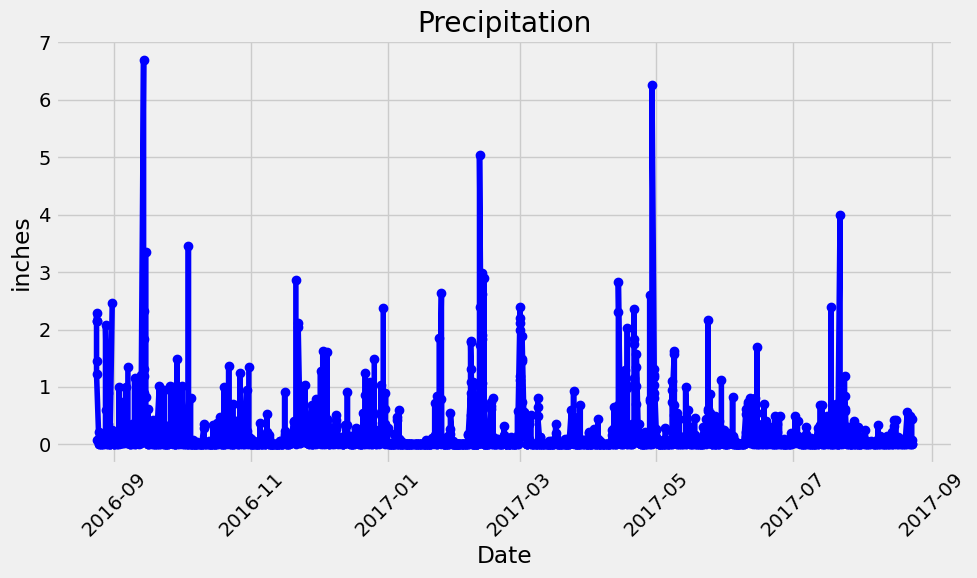

In [164]:
# Calculate the date one year from the most recent date
most_recent_date_dt = datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date_dt - timedelta(days=365)

# Convert the summary statistics to a DataFrame
summary_df = pd.DataFrame(summary_stats).transpose()

# Convert the DataFrame to HTML
html_table = summary_df.to_html(classes='dataframe', border=1, index=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['precipitation'], marker='o', linestyle='-', color='b')
plt.title('Precipitation')
plt.xlabel('Date')
plt.ylabel('inches')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

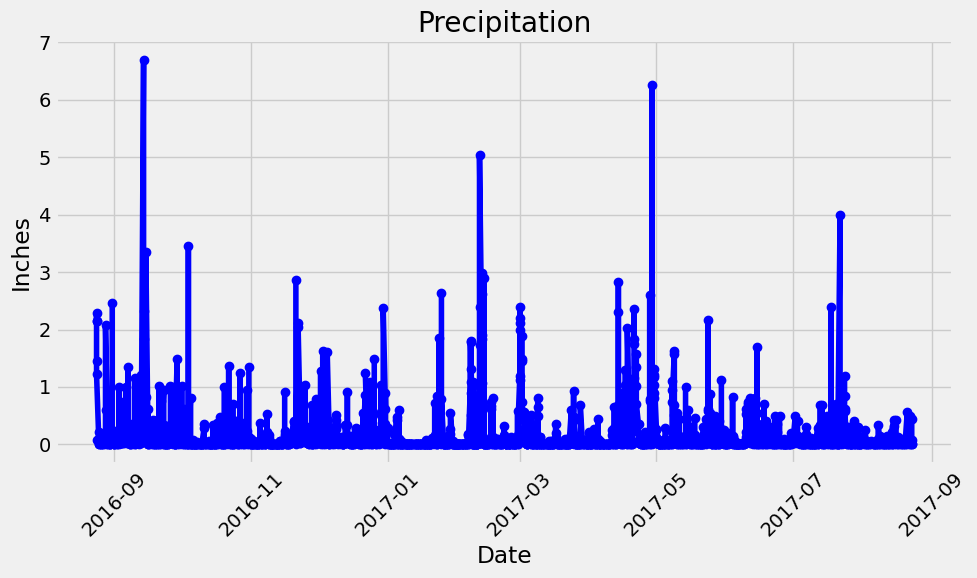

In [165]:
# Create an engine to the SQLite database
# Calculate the date one year from the most recent date
most_recent_date_dt = datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date_dt - timedelta(days=365)

# Sort the dataframe by date
df = df.sort_values(by='date')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['precipitation'], marker='o', linestyle='-', color='b')
plt.title('Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

# Close the session
session.close()

In [166]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['precipitation'].describe()
print('Summary Sattistics')

# Convert the summary statistics to a DataFrame
summary_df = pd.DataFrame(summary_stats).transpose()
summary_df.head
summary_stats

Summary Sattistics


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [167]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

# Print the total number of stations
print(f"Total number of stations in the dataset: {total_stations}")

Total number of stations in the dataset: 9


In [168]:
# Design a query to find the most active stations
# List the stations and their counts in descending order
active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

# Print the stations and their counts
print("Most active stations (stations with the most observations):")
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")


Most active stations (stations with the most observations):
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [169]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]  # The first element contains the station ID

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = (
    session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)
    )
    .filter(Measurement.station == most_active_station)
    .all()
)

# Extracting the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

# Print the results
print(f"Temperature statistics for the most active station (ID: {most_active_station}):")
print(f"Lowest Temperature: {lowest_temp}°F")
print(f"Highest Temperature: {highest_temp}°F")
print(f"Average Temperature: {avg_temp:.2f}°F")


Temperature statistics for the most active station (ID: USC00519281):
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66°F


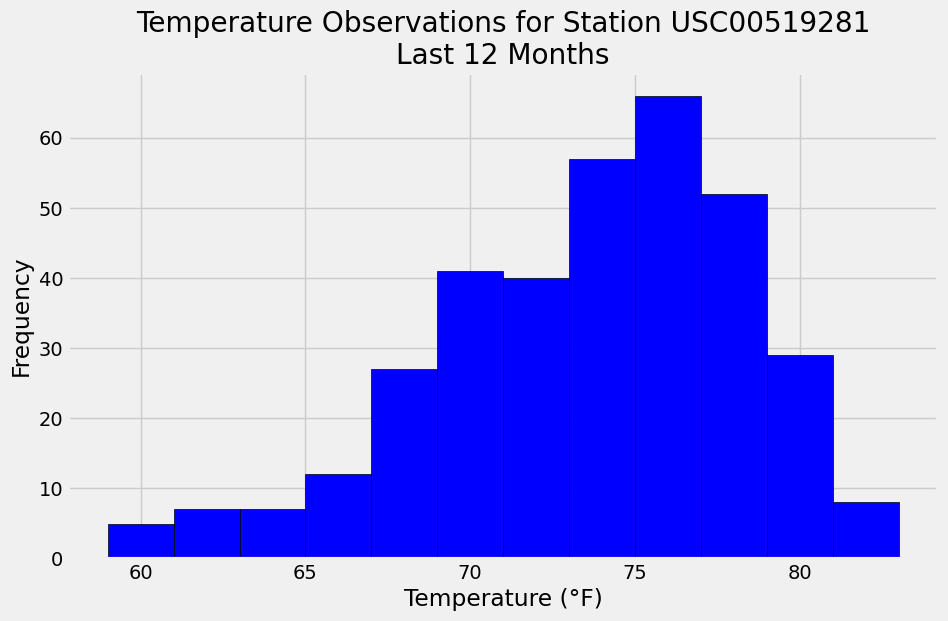

In [170]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date_dt = datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year ago from the most recent date
one_year_ago = most_recent_date_dt - timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station)
    .filter(Measurement.date >= one_year_ago)
    .all()
)

# Convert the query results to a list
temperature_list = [temp[0] for temp in temperature_data]

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_list, bins=12, color='blue', edgecolor='black')
plt.title(f'Temperature Observations for Station {most_active_station}\nLast 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Close Session

In [171]:
# Close Session
session.close()